# Importing the Packages

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Model

# Loading the Data

In [ ]:
data = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = data.load_data()
# Normalisation
X_train, X_test = X_train/255.0 , X_test/255.0


170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
y_train.shape

(50000, 1)

In [ ]:
# As the shape of target variable is not as expected we will flatten it.
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
# Number of classes
k = len(set(y_train))
print(k)

10


# Building the model with Functional API

In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i,x)

# Compiling
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Fitting
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5598 - accuracy: 0.4269 - val_loss: 1.2607 - val_accuracy: 0.5411
Epoch 2/15
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2647 - accuracy: 0.5442 - val_loss: 1.1528 - val_accuracy: 0.5816
Epoch 3/15
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1427 - accuracy: 0.5901 - val_loss: 1.0744 - val_accuracy: 0.6219
Epoch 4/15
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0468 - accuracy: 0.6249 - val_loss: 1.0279 - val_accuracy: 0.6394
Epoch 5/15
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9735 - accuracy: 0.6543 - val_loss: 0.9284 - val_accuracy: 0.6788
Epoch 6/15
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9089 - accuracy: 0.6769 - val_loss: 0.8895 - val_accuracy: 0.6882
Epoch 7/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8563 - accuracy: 0.6934 - val_loss: 0.8632 -

# Loss per Iteration

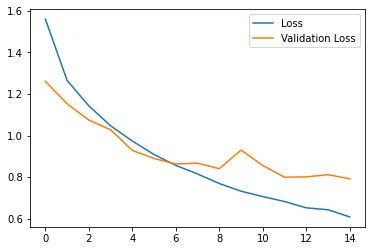

In [ ]:
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.legend()

We see that the model is overfitting and it will continue to do so if we increase the number of epochs.

# Accuracy per Iteration

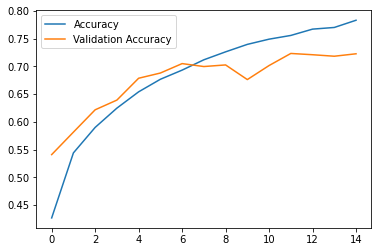

In [ ]:
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

# Confusion Matrix

Confusion matrix, without normalization
[[773  21  42   5  17   6  11  15  70  40]
 [ 17 821   4   7   4   3  14   4  34  92]
 [ 67   6 566  52 118  69  65  31  14  12]
 [ 21   9  60 448  83 217  74  56  10  22]
 [ 24   1  40  44 713  47  31  88   7   5]
 [ 19   3  28 145  45 643  36  62   6  13]
 [  5   3  29  46  43  25 828   6  12   3]
 [ 11   2  19  24  59  66  10 790   2  17]
 [ 62  22  10  13  10   8   6   4 842  23]
 [ 23  75   2  11   3   6  15  27  33 805]]


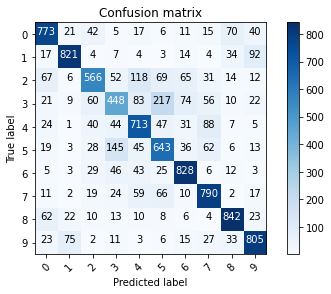

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


# Observation

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

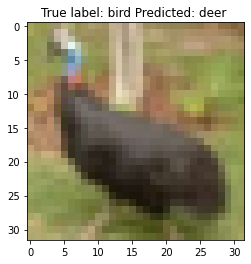

In [ ]:
# misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i])
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

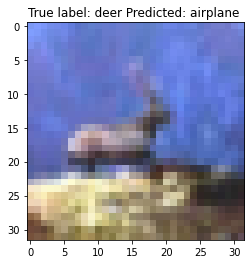

In [ ]:
# misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i])
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

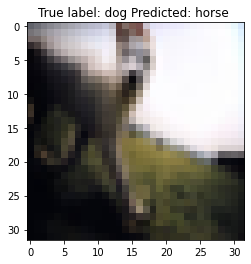

In [ ]:
# misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i])
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

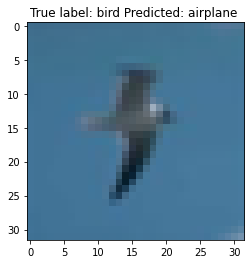

In [ ]:
# misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i])
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

# By: Rashi Saluja